# Data Reading

In [1]:
import pandas as pd

Data = pd.read_excel(r'/content/DataSet.xlsx')

# Outlier Detection (IQR method)

In [2]:
import pandas as pd
import numpy as np

class IQR:
    def __init__(self, feature, DataFrame):
        """
        Initialize the IQR outlier detection class.

        Parameters:
        - feature: str
            The name of the feature (column) in the DataFrame that might have outliers.
        - DataFrame: pandas DataFrame
            The main DataFrame in which the dataset is stored.
        """
        self.feature = feature
        self.DataFrame = DataFrame
        self.Outliers = []
        self.deleted_data = pd.DataFrame()

    def detect(self):
        """
        Detect outliers using the Interquartile Range (IQR) method.

        Returns:
        - outliers: list
            A list of indices indicating the outlier rows in the DataFrame.
        """
        Q1 = self.DataFrame[self.feature].quantile(0.25)
        Q3 = self.DataFrame[self.feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        upper_array = np.where(self.DataFrame[self.feature] >= upper)[0]
        lower_array = np.where(self.DataFrame[self.feature] <= lower)[0]

        outliers = list(np.unique(np.concatenate((upper_array, lower_array))))
        return outliers

    def remove_outliers(self, outliers):
        """
        Remove outliers from the DataFrame and store the deleted data.

        Parameters:
        - outliers: list
            A list of indices indicating the outlier rows to be removed.

        Returns:
        - new_df: pandas DataFrame
            The updated DataFrame after removing outliers.
        - deleted_data: pandas DataFrame
            The removed data (rows) from the DataFrame.
        """
        if len(outliers) > 0:
            self.Outliers += outliers
            self.deleted_data = self.deleted_data.append(self.DataFrame.iloc[outliers])
            new_df = self.DataFrame.drop(outliers).reset_index(drop=True)
        else:
            new_df = self.DataFrame.copy()

        return new_df, self.deleted_data


# iterative call
deleted_data = pd.DataFrame()
Modified_Data = Data.copy()

for feature in Data.columns:
    if feature in ['Reaction Energy','Activation Energy']:
        outlier_detector = IQR(feature=feature, DataFrame=Modified_Data)
        outliers = outlier_detector.detect()
        Modified_Data, deleted_rows = outlier_detector.remove_outliers(outliers)
        deleted_data = deleted_data.append(deleted_rows)

# Retrieve the removed data and the new DataFrame without outliers after the last iteration
for outlier in outlier_detector.Outliers:
    if outlier < len(Modified_Data):
       deleted_data = deleted_data.append(Modified_Data.iloc[outlier])

print("Removed Data:")
print(deleted_data)
print()
print("New DataFrame without Outliers:")
print(Modified_Data)

Removed Data:
     Reaction Energy  Catalyst  surface    AB     A     B  Activation Energy
22           3.41200      47.0      5.0   2.0   1.0   5.0            4.16000
38           4.13300      26.0      4.0  37.0  11.0   1.0            4.13300
39           5.73300      26.0      2.0  37.0  11.0   1.0            5.73300
101          3.34634      47.0      5.0   9.0   3.0   6.0            3.35234
103          3.32900      47.0      5.0  26.0   2.0   6.0            3.98000
..               ...       ...      ...   ...   ...   ...                ...
534         -0.99000      27.0      3.0  64.0  22.0  26.0            0.46000
535         -0.92500      29.0      6.0  63.0  22.0  26.0            0.48500
536         -1.46000      27.0      5.0  64.0  22.0  26.0            0.50000
537         -1.36000      27.0      6.0  64.0  22.0  26.0            0.50000
617          0.15300      45.0      5.0  77.0  27.0  16.0            1.09400

[121 rows x 7 columns]

New DataFrame without Outliers:
     

<ipython-input-2-b94d04227e7e>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.deleted_data = self.deleted_data.append(self.DataFrame.iloc[outliers])
<ipython-input-2-b94d04227e7e>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_data = deleted_data.append(deleted_rows)
<ipython-input-2-b94d04227e7e>:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.deleted_data = self.deleted_data.append(self.DataFrame.iloc[outliers])
<ipython-input-2-b94d04227e7e>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_data = deleted_data.append(deleted_rows)
<ipython-input-2-b94d04227e7e>:78: FutureWarning: The frame.append met

# Train-Test Split

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

X = Modified_Data[['Reaction Energy',
          'Catalyst',
          'surface',
          'AB',
          'A',
          'B']]

Y = Modified_Data[['Activation Energy']]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, np.ravel(Y),
                                          test_size = 0.20, random_state = 20)

# Data Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

# # # Scaled Data
# Input_scaler = MinMaxScaler(feature_range = (0,1))
# Output_scaler = MinMaxScaler(feature_range = (0,1))

Input_scaler = StandardScaler()
Output_scaler = StandardScaler()

Scaled_X_Train = Input_scaler.fit_transform(X_Train)
Scaled_X_Test = Input_scaler.transform(X_Test)

Scaled_Y_Train = Output_scaler.fit_transform(Y_Train.reshape(-1,1))
Scaled_Y_Test = Output_scaler.transform(Y_Test.reshape(-1,1))

print("Scaled_X_Train= ", Scaled_X_Train)
print("Scaled_Y_Train= ", Scaled_Y_Train)
print("Scaled_X_Test= ", Scaled_X_Test)
print("Scaled_Y_Test= ", Scaled_Y_Test)

Scaled_X_Train=  [[ 0.66027506 -0.12550926  0.44205923  0.55220742  0.04076982 -0.33751834]
 [ 0.53463264 -0.17765412 -0.24419702  0.22060635  0.04076982  1.03509799]
 [-1.41786888 -1.27269625 -0.24419702  0.17323476  0.04076982  1.03509799]
 ...
 [-0.16511309 -1.37698598 -1.61670952 -0.01625156  0.16628591 -1.82451937]
 [-0.05689553  1.4909815  -0.24419702  0.74169375  0.04076982  0.69194391]
 [-1.13265142 -1.11626166  0.44205923  0.31534951 -1.59093926  0.57755921]]
Scaled_Y_Train=  [[-2.05057533e-02]
 [ 2.61499353e-02]
 [-7.45296450e-01]
 [-1.00787033e+00]
 [-4.97912799e-01]
 [-2.05057533e-02]
 [ 8.58357217e-01]
 [ 6.84754655e-01]
 [-4.27386758e-01]
 [ 1.07656338e-01]
 [ 7.82406096e-01]
 [-6.93215681e-01]
 [ 2.03017451e+00]
 [ 9.56008658e-01]
 [ 1.39001506e+00]
 [ 1.19456699e-03]
 [ 7.17305136e-01]
 [-9.65559314e-03]
 [ 8.69207377e-01]
 [ 4.56901292e-01]
 [ 1.22726266e+00]
 [-1.13807225e+00]
 [-8.77668404e-01]
 [ 9.88460082e-02]
 [ 4.23265796e-01]
 [ 2.56183236e+00]
 [-5.08762959e-0

# Model Building

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , LSTM , RNN
from tensorflow.keras import activations
from sklearn.metrics import mean_squared_error , mean_absolute_error

## Model Building
model = Sequential()
model.add(Dense(6, activation='linear', input_shape=(6,)))
model.add(Dense(32, activation='tanh'))
# model.add(Dense(8, activation='linear'))
# model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 32)                224       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss= 'mean_squared_error' ,
              metrics = 'mean_absolute_percentage_error')


In [22]:
# Fit
history = model.fit(x= Scaled_X_Train ,
                    y= Scaled_Y_Train ,
                    epochs = 100,
                    validation_data = (X_Test, Y_Test),
                    shuffle = True)

Epoch 1/100
18/18 [==============================] - 2s 14ms/step - loss: 0.0454 - mean_absolute_percentage_error: 188.5462 - val_loss: 4.4231 - val_mean_absolute_percentage_error: 282.1284
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0443 - mean_absolute_percentage_error: 186.4798 - val_loss: 4.5428 - val_mean_absolute_percentage_error: 289.0053
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0446 - mean_absolute_percentage_error: 177.6967 - val_loss: 4.4105 - val_mean_absolute_percentage_error: 281.8006
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0444 - mean_absolute_percentage_error: 189.3961 - val_loss: 4.4643 - val_mean_absolute_percentage_error: 284.4963
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0441 - mean_absolute_percentage_error: 181.8934 - val_loss: 4.4490 - val_mean_absolute_percentage_error: 284.0396
Epoch 6/100
18/18 [==============================] - 0

# Prediction

In [23]:
import pandas as pd

# Using Model to Predict the Output
Train_Predict = model.predict(Scaled_X_Train)
Test_Predict = model.predict(Scaled_X_Test)

# Returning the Predicted Values to the Base Form
Predicted_Y_Train = Output_scaler.inverse_transform(Train_Predict)
Predicted_Y_Test = Output_scaler.inverse_transform(Test_Predict)


5/5 [==============================] - 0s 3ms/step


# Errors

In [24]:
from sklearn.metrics import r2_score

r2_score_Train= r2_score(Y_Train , Predicted_Y_Train[:,0])
r2_score_Test= r2_score(Y_Test , Predicted_Y_Test[:,0])

print('r2_score_Train=' , r2_score_Train)
print('r2_score_Test=' , r2_score_Test)

from sklearn.metrics import mean_squared_error as MSE

MSE_Train= MSE(Y_Train , Predicted_Y_Train[:,0])
MSE_Test= MSE(Y_Test , Predicted_Y_Test[:,0])

print('MSE_Train=' , MSE_Train)
print('MSE_Test=' , MSE_Test)

r2_score_Train= 0.9588685022754775
r2_score_Test= 0.8632951909818692
MSE_Train= 0.03493833691357516
MSE_Test= 0.11556381599728596


# Cross-Plot

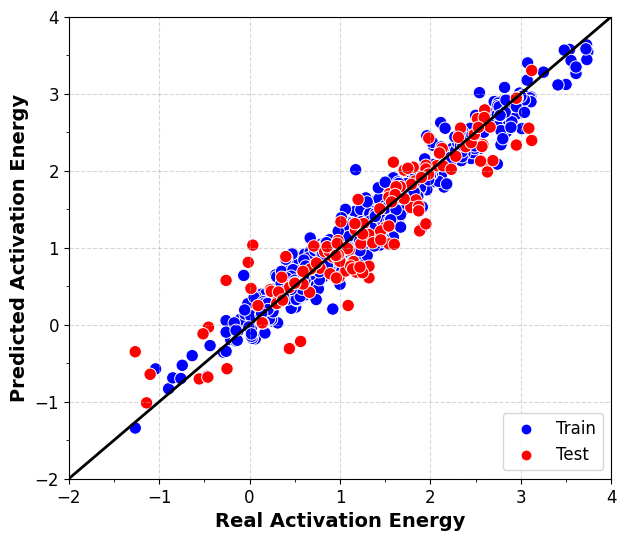

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Create a DataFrame
df_train = pd.DataFrame({'Real Activation Energy': Y_Train, 'Predicted Activation Energy':Predicted_Y_Train[:,0], 'Dataset': 'Train'})
df_test = pd.DataFrame({'Real Activation Energy': Y_Test, 'Predicted Activation Energy': Predicted_Y_Test[:,0], 'Dataset': 'Test'})
df = pd.concat([df_train, df_test])

# Set Seaborn style
# sns.set(style="white")


# Define a custom palette for scatter point colors
custom_palette = {'Train': 'blue', 'Test': 'red'}

# Create a scatter plot
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(7, 6))
scatter = sns.scatterplot(data=df, x='Real Activation Energy', y='Predicted Activation Energy', hue='Dataset',
                          s=80, edgecolor='white', markers={'Train': 'o', 'Test': 's'}, palette=custom_palette)


# Add best fit line
plt.plot([-2,0,2,4],[-2,0,2,4], "k", linewidth=2)

# Set axis labels and title
plt.xlabel('Real Activation Energy', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Activation Energy', fontsize=14,fontweight='bold')
# plt.title('XGBoost Prediction', fontsize=16, fontweight='bold')

# Customize legend and grid and ticks
plt.legend(loc='lower right', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.grid(linestyle='--', alpha=0.5)

# Set plot limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Change axis colors
plt.gca()
ax.spines['left'].set_color('black')  # Change left axis color
ax.spines['bottom'].set_color('black')  # Change bottom axis color

# Set a custom background color
# plt.gca().set_facecolor('#f0f0f0')

# Remove right and top axes
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# Set x-axis and y-axis tick positions and labels
Ticks = [i for i in range(-2,5)]
ax.set_xticks(Ticks)
ax.set_yticks(Ticks)

# Add minor tick positions on both axes at intervals of 0.5
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))

# # Add custom label "a)"
# ax.text(0.02, 0.98, "a)", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

# Save the plot as a high-resolution image (300 dpi)
plt.savefig('CrossPlot.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

# Random Forest

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 5)
model.fit(X_Train , Y_Train)

# Using Model to Predict the Output
Train_Predict = model.predict(X_Train).reshape(-1,1)
Test_Predict = model.predict(X_Test).reshape(-1,1)


import math

from sklearn.metrics import r2_score

r2_score_Train= r2_score(Y_Train , Train_Predict)
r2_score_Test= r2_score(Y_Test , Test_Predict)

print('r2_score_Train=' , r2_score_Train)
print('r2_score_Test=' , r2_score_Test)

r2_score_Train= 0.9653957750751727
r2_score_Test= 0.7961592449773056


In [113]:
# Parameter Tuning

from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# defining parameter range
param_grid = {'n_estimators': [1,5,10,15],
              'max_depth': [1,2,3,4,5,6],
              'max_features': ['auto' , 'log2' , 'sqrt' , 'None'],
              'ccp_alpha' :[0 , 0.1 , 0.5 , 1 , 5 ,10]}

grid = GridSearchCV(estimator= model,
                    param_grid= param_grid,
                    refit = True,
                    cv= 10,
                    verbose = 0)

# fitting the model for grid search
grid.fit(X_Train, np.ravel(Y_Train))

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'ccp_alpha': 0, 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 15}
RandomForestRegressor(ccp_alpha=0, max_depth=6, max_features='auto',
                      n_estimators=15)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

In [111]:
model = RandomForestRegressor(n_estimators= 15,
                              max_depth= 9,
                              max_features= 'sqrt',
                              ccp_alpha= 0)
model.fit(X_Train , Y_Train)

# Using Model to Predict the Output
Train_Predict = model.predict(X_Train).reshape(-1,1)
Test_Predict = model.predict(X_Test).reshape(-1,1)

from sklearn.metrics import r2_score

r2_score_Train= r2_score(Y_Train , Train_Predict[:,0])
r2_score_Test= r2_score(Y_Test , Test_Predict[:,0])

print('r2_score_Train=' , r2_score_Train)
print('r2_score_Test=' ,r2_score_Test)

from sklearn.metrics import mean_squared_error as MSE

MSE_Train= MSE(Y_Train , Train_Predict[:,0])
MSE_Test= MSE(Y_Test , Test_Predict[:,0])

print('MSE_Train=' , MSE_Train)
print('MSE_Test=' , MSE_Test)

r2_score_Train= 0.9499173541889523
r2_score_Test= 0.861511861766581
MSE_Train= 0.042541712548104196
MSE_Test= 0.11707135864175008


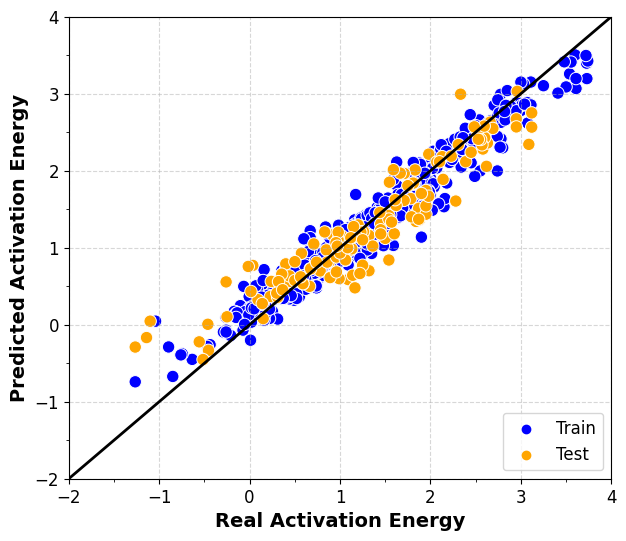

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Create a DataFrame
df_train = pd.DataFrame({'Real Activation Energy': Y_Train, 'Predicted Activation Energy':Train_Predict[:,0], 'Dataset': 'Train'})
df_test = pd.DataFrame({'Real Activation Energy': Y_Test, 'Predicted Activation Energy': Test_Predict[:,0], 'Dataset': 'Test'})
df = pd.concat([df_train, df_test])

# Set Seaborn style
# sns.set(style="white")


# Define a custom palette for scatter point colors
custom_palette = {'Train': 'blue', 'Test': 'orange'}

# Create a scatter plot
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(7, 6))
scatter = sns.scatterplot(data=df, x='Real Activation Energy', y='Predicted Activation Energy', hue='Dataset',
                          s=80, edgecolor='white', markers={'Train': 'o', 'Test': 's'}, palette=custom_palette)


# Add best fit line
plt.plot([-2,0,2,4],[-2,0,2,4], "k", linewidth=2)

# Set axis labels and title
plt.xlabel('Real Activation Energy', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Activation Energy', fontsize=14,fontweight='bold')
# plt.title('XGBoost Prediction', fontsize=16, fontweight='bold')

# Customize legend and grid and ticks
plt.legend(loc='lower right', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
plt.grid(linestyle='--', alpha=0.5)

# Set plot limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Change axis colors
plt.gca()
ax.spines['left'].set_color('black')  # Change left axis color
ax.spines['bottom'].set_color('black')  # Change bottom axis color

# Set a custom background color
# plt.gca().set_facecolor('#f0f0f0')

# Remove right and top axes
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# Set x-axis and y-axis tick positions and labels
Ticks = [i for i in range(-2,5)]
ax.set_xticks(Ticks)
ax.set_yticks(Ticks)

# Add minor tick positions on both axes at intervals of 0.5
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.5))

# # Add custom label "a)"
# ax.text(0.02, 0.98, "a)", transform=ax.transAxes, fontsize=14, fontweight='bold', va='top', ha='left')

# Save the plot as a high-resolution image (300 dpi)
plt.savefig('CrossPlot.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()